# Análise exploratória 

## Importação de bibliotecas utilizadas

- Verificar se tem valores aleatorios nos dados categóricos

- Qual a taxa de ataque cardíaco em pessoas com dor nao anginosa e assintomático? 
- Thal e tipo de dores no peito. Ela justifica os dados da pergunta anterior? 
- Genero e colesterol
- Qual genero tem maior incidência de ataque cardíaco 
- Alteração no eletrocardiograma implica 


In [ ]:
pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 9.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import PyQt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##  Importação e visualização do dataset

### Descrição

- **Age**: idade do paciente (entre 29 e 77);
- **Sex**: sexo do paciente (0 ou 1)
    - 0: mulher;
    - 1: homem;
- **Cp**: tipo de dor no peito;
    - Valor 1: angina típica;
    - Valor 2: angina atípica;
    - Valor 3: dor não anginosa;
    - Valor 4: assintomático;
- **Trtbps**: pressão arterial em repouso (em mmHg)
- **Chol**: colestoral em mg/dl obtido via sensor de IMC
- **Fbs**: açúcar no sangue em jejum > 120 mg/dl 
    - Valor 1 = True; 
    - Valor 0 = False;
- **Restecg**: resultados eletrocardiográficos em repouso
    - Valor 0: normal;
    - Valor 1: anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV);
    - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes (que critério é esse? ver dps);
- **Thalachh**:frequência cardíaca máxima alcançada
- **Exang**:angina induzida por exercício
    - Valor 1: sim;
    - Valor 2: não;
- **Oldpeak**: pico anterior
- **Slp** (slope): inclinação do pico do segmento ST do exercício 
    - Valor 0: descendente;
    - Valor 1: plano; 
    - Valor 2: ascendente: 
- **Ca**: número de vasos principais (0-3);
- **thal**: que isso????
    - 1: defeito corrigido; 
    - 2: normal; 
    - 3: defeito reversível;
- **output**: (target) : 
    - 0: menos chance de ataque cardíaco;
    - 1: mais chance de ataque cardíaco.


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
saturation = pd.read_csv('o2Saturation.csv')

In [ ]:
# juntar os dados numa tabela só para facilitar manipulação 
df['saturation'] = saturation

In [ ]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [ ]:
df.shape

(303, 15)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'saturation'],
      dtype='object')

## Preparação dos dados

### Tipos de dados 
Antes de operarmos sobre os dados, é importante verificar os tipos de dados que compõem nosso dataset. 

Dentre as possibilidades, podemos evidenciar que 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trtbps      303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalachh    303 non-null    int64  
 8   exng        303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    int64  
 11  caa         303 non-null    int64  
 12  thall       303 non-null    int64  
 13  output      303 non-null    int64  
 14  saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


### Verificando presença de dados nulos

Acrescentar descrição da importância desse processo. Nesse caso, não há dados nulos, mas também é interessante manter em mente o comando a seguir, dados que ele apresenta uma contagem dos dados nulos presentes em cada coluna. 

Algumas vezes também é interessante visualizarmos essa soma com uma distribuição de frequências de modo a criar mais intuição sobre o comportamento dos dados de cada coluna 


In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
thall         0
output        0
saturation    0
dtype: int64

### Valores únicos em cada coluna

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Valores únicos"]).transpose()

,Valores únicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
df['cp'].head

<bound method NDFrame.head of 0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64>

### Atributos redundantes 
De forma simplificada, dizemos que atributos redundantes são aqueles que podem ser obtidos a partir de outros atributos. Ou seja, não é uma informação estritamente necessária e significativa para as análises e tomadas de decisão. 

Dentre as vantagens de executar tal limpeza encontramos o processo de diminuir a dimensão do conjunto de dados, aumentar a precisão dos resultados ( dados que atributos redundantes podem distorcer os resultados), melhorar o desempenho de modelos de machine learning e principalmente auxilia na visualização e interpretação dos dados. 

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

#### Correlação
Ainda nesse sentido, podemos recorrer a análise de correlação entre os dados para verificar o grau de dependência entre as variáveis (pode ou não ser causal - explicar melhor AQUI)

#### Coeficiente de Pearson
Também chamado de *"coeficiente de correlação produto-momento"* ele explicita essa correlação entre as variáveis utilizando a 
https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

Note que nossas colunas já são numéricas e, portanto, posso aplicar .corr() direto. Se não fosse deveria excluir as colunas que não fossem numericas antes de aplicar a correlação.

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,saturation
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.019479
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.133972
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.136100
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.045749
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.030027
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.054655
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.070147
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.149697
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.081410
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.017763


In [ ]:
def correlacao(df):
  '''
  Determina a correlação para cada par de atributos em todo o conjunto de dados e armazena em um novo dataframe
  '''
  df_corr = pd.DataFrame(columns=['coluna1', 'coluna2', 'corr'])
  for coluna_x in df.columns:
    for coluna_y in df.columns:
      if coluna_x == coluna_y:
        continue
      cor = df[coluna_x].corr(df[coluna_y])
      df_corr = df_corr.append({'coluna1': coluna_x, 'coluna2': coluna_y, 'corr': cor}, ignore_index=True)
  return df_corr

df_corr = correlacao(df)

In [ ]:
df_corr

,coluna1,coluna2,corr
0,age,sex,-0.098447
1,age,cp,-0.068653
2,age,trtbps,0.279351
3,age,chol,0.213678
4,age,fbs,0.121308
...,...,...,...
205,saturation,oldpeak,0.017763
206,saturation,slp,-0.044691
207,saturation,caa,-0.133258
208,saturation,thall,-0.010630


In [ ]:
df_corr.sort_values(['corr'], ascending=True)

,coluna1,coluna2,corr
149,slp,oldpeak,-0.577537
135,oldpeak,slp,-0.577537
190,output,exng,-0.436757
124,exng,output,-0.436757
138,oldpeak,output,-0.430696
...,...,...,...
147,slp,thalachh,0.386784
110,thalachh,output,0.421741
189,output,thalachh,0.421741
184,output,cp,0.433798


## TIpos de variáveis

Durante o processo de compreensão e análise dos dados, vamos nos deparar com variáveis ditas numéricas e categóricas. Nota-se que para cada uma delas há formas específicas de extrair informações e quantificar as análises requeridas. 

Buscaremos relacionar as variáveis categóricas e numericas com o resultado do output (risco ou nao de doença)

In [ ]:
var_categoricas = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
var_numericas = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']
print(f'Variáveis categóricas: {var_categoricas}\nVariáveis numéricas: {var_numericas}')

Variáveis categóricas: ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Variáveis numéricas: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


### Analisando cada variável

In [ ]:
paleta = ['#304D63', '#B2E7E8','#8FB9AA','#F9E076','#ED8975']

In [ ]:
df.loc[:,'age'].drop_duplicates()

0      63
1      37
2      41
3      56
4      57
7      44
8      52
10     54
11     48
12     49
13     64
14     58
15     50
17     66
18     43
19     69
20     59
22     42
23     61
24     40
25     71
27     51
28     65
29     53
35     46
42     45
44     39
47     47
52     62
58     34
65     35
72     29
75     55
82     60
85     67
86     68
129    74
144    76
145    70
163    38
238    77
Name: age, dtype: int64

In [ ]:
_ = df['age'].min()
print(f'Idade mínima: {_} anos')

Idade mínima: 29 anos


In [ ]:
_ = df['age'].max()
print(f'Idade máxima: {_} anos')

Idade máxima: 77 anos


## Variáveis numéricas

### Idade

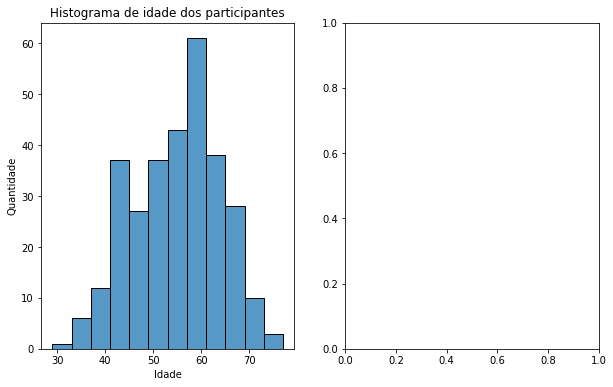

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria a primeira subfigura
plt.subplot(1, 2, 2)
fig = px.scatter(df['age'], x="age", color="age")
fig.update_layout(title={
    'text': '<b>Scatterplot das idades dos participantes</b>',
    'x': 0.5,
    'xanchor': 'center'},
width=400)

# Cria a segunda subfigura
plt.subplot(1, 2, 1)
sns.histplot(data=df['age'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Histograma de idade dos participantes')

# Mostra a figura completa
plt.show()

Text(0.5, 1.0, 'Histograma de idade dos participantes')

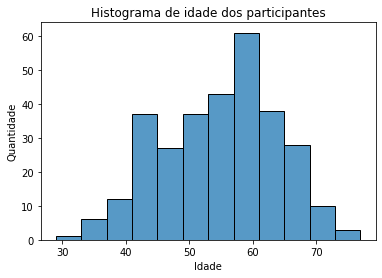

In [ ]:
sns.histplot(data=df['age'])
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Histograma de idade dos participantes')

In [ ]:
fig = px.scatter(df['age'], x="age", color="age")
fig.update_layout(title={
    'text': '<b>Scatterplot das idades dos participantes</b>',
    'x': 0.5,
    'xanchor': 'center'
})

fig.show()

Note que temos uma boa distribuição de idades, predominantemente entre 40 - 60. 

'age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

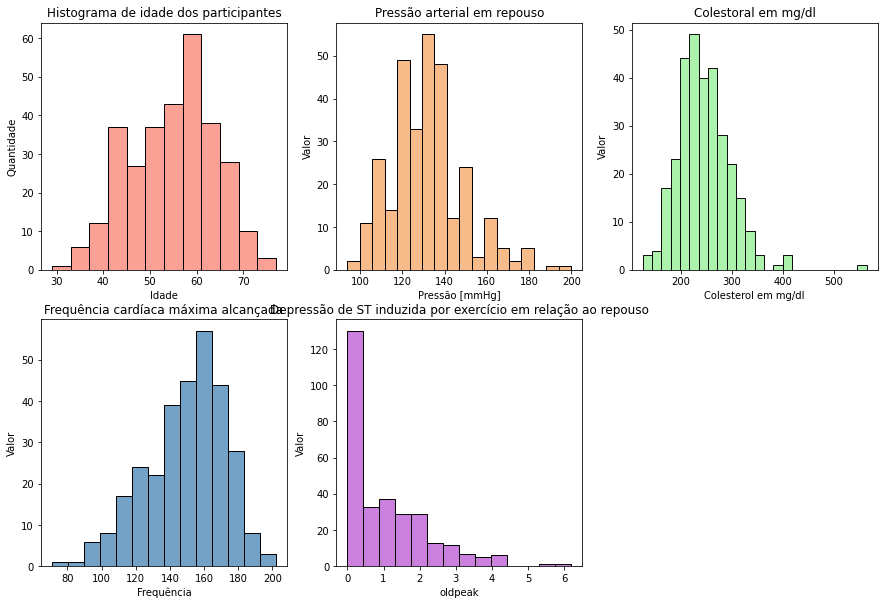

In [ ]:
fig = plt.figure(figsize=(15,10))

# Cria a primeira subfigura
plt.subplot(2,3,1)
sns.histplot(data=df['age'], color='salmon')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Histograma de idade dos participantes')

plt.subplot(2,3,2)
sns.histplot(data=df['trtbps'], color = 'sandybrown')
plt.xlabel('Pressão [mmHg]')
plt.ylabel('Valor')
plt.title('Pressão arterial em repouso')

plt.subplot(2,3,3)
sns.histplot(data=df['chol'], color = 'lightgreen')
plt.xlabel('Colesterol em mg/dl')
plt.ylabel('Valor')
plt.title('Colestoral em mg/dl')

plt.subplot(2,3,4)
sns.histplot(data=df['thalachh'], color='steelblue')
plt.xlabel('Frequência')
plt.ylabel('Valor')
plt.title('Frequência cardíaca máxima alcançada')

plt.subplot(2,3,5)
sns.histplot(data=df['oldpeak'], color='mediumorchid')
plt.xlabel('oldpeak')
plt.ylabel('Valor')
plt.title('Depressão de ST induzida por exercício em relação ao repouso')



plt.show()


## Graficos gerados individualmente

### Pressão sanguínea
pressão arterial em repouso (em mm Hg)

Text(0.5, 1.0, 'Pressão arterial em repouso')

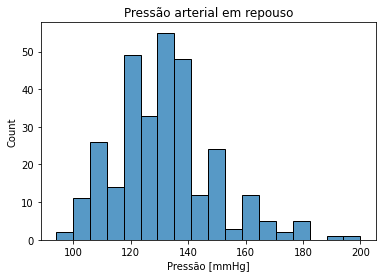

In [ ]:
sns.histplot(data=df['trtbps'])
plt.xlabel('Pressão [mmHg]')
plt.ylabel('Count')
plt.title('Pressão arterial em repouso')

Text(0.5, 1.0, 'chol')

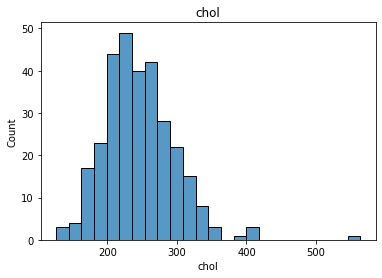

In [ ]:
sns.histplot(data=df['chol'])
plt.xlabel('chol')
plt.ylabel('Count')
plt.title('chol')

Text(0.5, 1.0, 'thalachh')

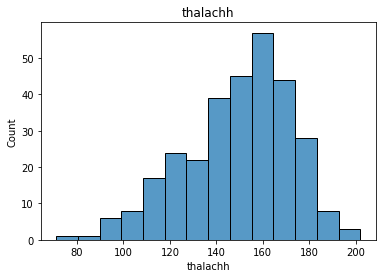

In [ ]:
sns.histplot(data=df['thalachh'])
plt.xlabel('thalachh')
plt.ylabel('Count')
plt.title('thalachh')

## Qualitativas

In [ ]:
plt.figure(figsize=(8,6))
colors = ['#D8BFD8', '#B0E0E6']
sns.histplot(data=df, x="sex", kde=False, bins=2, color=colors, edgecolor="black")
# Configura o estilo e o título
sns.set_style("darkgrid")
sns.set_context("talk")
plt.title("Histograma do total da conta")

# Mostra o gráfico
plt.show()

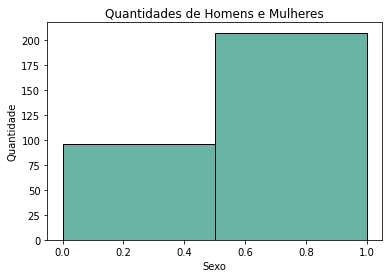

In [ ]:
#colors = ['#ED8975','#304D63']
fig, ax = plt.subplots()
ax.hist(df['sex'], bins=2, color="#69b3a2", edgecolor="black")
ax.set_title('Quantidades de Homens e Mulheres')
ax.set_xlabel('Sexo')
ax.set_ylabel('Quantidade')
plt.show()


In [ ]:
# analisando genero 

colors = ['#ED8975','#304D63']
fig = px.histogram(df, nbins=2, title='Quantidades de Homens e Mulheres', x='sex', color='sex', color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


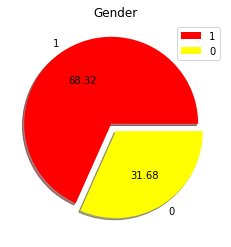

In [ ]:
myexplode=[.1,0]
label=['Male','Femail']
plt.pie(df['sex'].value_counts(),autopct='%.2f',labels=df['sex'].value_counts().index,colors=['red','yellow'],explode=myexplode,shadow=True)
plt.title('Gender')
plt.legend()

Note que temos quase o dobro de pacientes homens do que mulheres

In [ ]:

colors = ['#B2E7E8','#8FB9AA','#F9E076','#ED8975']
fig = px.histogram(df, nbins=4, x='cp', color='cp', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Frequência de angina nos participantes</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

#### Tentar inserir qual a porcentagem de cada bin depois

### Açúcar no sangue

In [ ]:
fig = px.histogram(df, nbins=2, x='fbs', color='fbs', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Quantidade de acúcar no sangue</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

### Eletrocefalograma repouso 
 Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


In [ ]:
fig = px.histogram(df, nbins=3, x='restecg', color='restecg', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Resultados de eletrocefalograma</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

NameError: ignored

### Exercício de pico
inclinação do segmento ST do exercício de pico (2 = ascendente: 1 = plana; 0 = descendente)

In [ ]:
fig = px.histogram(df, nbins=3, x='slp', color='slp', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Exercício de pico</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

### Angina induzida por exercício 
1 sim
0 não

In [ ]:

fig = px.histogram(df, nbins=2, x='exng', color='exng', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Angina induzida por exercício</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

### número de vasos principais

In [ ]:

fig = px.histogram(df, nbins=5, x='caa', color='caa', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>número de vasos principais</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

###  frequência cardíaca máxima alcançada

In [ ]:

fig = px.histogram(df, nbins=5, x='thall', color='thall', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Frequência cardíaca máxima alcançada</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

### Chance ataque cardíaco 


In [ ]:

fig = px.histogram(df, nbins=2, x='output', color='output', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title={
    'text': '<b>Chance de ataque cardíaco</b>',
    'x': 0.5,
    'xanchor': 'center'
})
fig.show()

In [ ]:
df['age'].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64